# Case Study: Palladium Catalyzed AAA reactions 
#### Goal: Test if seperating reactions or Trost by ligand provides clusters that can be linearly modelled

In [8]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 16})

sys.path.append('../src')

### Import results for visualization

In [2]:
MLR_df = pd.read_excel('../results/phoxvtrostresults.xlsx',sheet_name='sheet1')

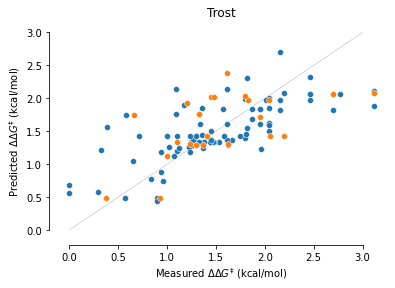

Cluster trost R2 0.5085734963848152
Cluster trost MAE 0.4033911185893974


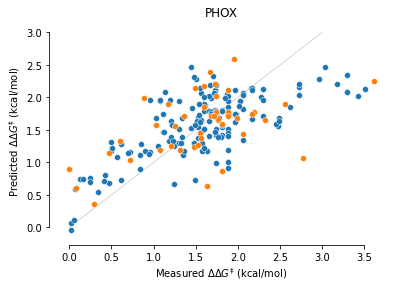

Cluster phox R2 0.4953813256614107
Cluster phox MAE 0.46246985682907715


In [4]:
for ligand in ['trost','phox']:
    temp_df = MLR_df[MLR_df['Ligand'] == ligand]

    train_index = temp_df['Class'] == 'Train'
    test_index = temp_df['Class'] == 'Test'

    train = temp_df.loc[train_index,:]
    test = temp_df.loc[test_index,:]

    sns.scatterplot(x=train['Measured ΔΔG'],y=train['Predicted ΔΔG'])
    sns.scatterplot(x=test['Measured ΔΔG'],y=test['Predicted ΔΔG'])

    plt.plot([0,3],[0,3],color='grey',zorder=0, linewidth=0.3)

    sns.despine(offset=5, trim=True)

    
    plt.xlabel('Measured $\Delta\Delta G^‡$ (kcal/mol)')
    plt.ylabel('Predicted $\Delta\Delta G^‡$ (kcal/mol)')
    if ligand == 'trost':
        plt.title('Trost')
    else:
        plt.title('PHOX')
    plt.show()

    print("Cluster " + str(ligand) + " R2 " + str(r2_score(train['Measured ΔΔG'],train['Predicted ΔΔG'])))
    print("Cluster " + str(ligand) + " MAE " + str(mean_absolute_error(test['Measured ΔΔG'],test['Predicted ΔΔG'])))


Cluster phox R2 0.4953813256614107
 MAE 0.44188181168494634


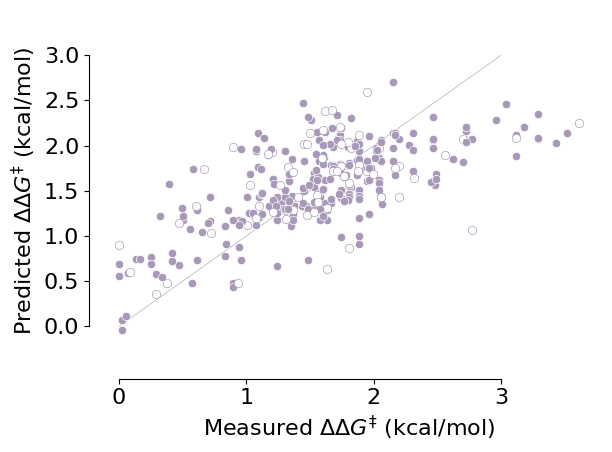

In [9]:
color_list = ['#008580', '#531C93', '#ED9B40', '#BA3B46', '#131200','#A799B7']

for number, ligand in enumerate(['trost','phox']):
    temp_df = MLR_df[MLR_df['Ligand'] == ligand]

    train_index = temp_df['Class'] == 'Train'
    test_index = temp_df['Class'] == 'Test'

    train = temp_df.loc[train_index,:]
    test = temp_df.loc[test_index,:]

    sns.scatterplot(x=train['Measured ΔΔG'],y=train['Predicted ΔΔG'], color='#A799B7')
    sns.scatterplot(x=test['Measured ΔΔG'],y=test['Predicted ΔΔG'], color='white', edgecolor='#A799B7')

plt.plot([0,3],[0,3],color='grey',zorder=0, linewidth=0.3)

sns.despine(offset=5, trim=True)


plt.xlabel('Measured $\Delta\Delta G^‡$ (kcal/mol)')
plt.ylabel('Predicted $\Delta\Delta G^‡$ (kcal/mol)')

print("Cluster " + str(ligand) + " R2 " + str(r2_score(train['Measured ΔΔG'],train['Predicted ΔΔG'])))
print(" MAE " + str(mean_absolute_error(MLR_df[MLR_df['Class'] == 'Test']['Measured ΔΔG'],MLR_df[MLR_df['Class'] == 'Test']['Predicted ΔΔG'])))
plt.ylim(-0.5,3.5)
plt.tight_layout()
plt.savefig('fig.pdf')
plt.show()